In [1]:
# Init
import os
import glob
import sys
import pickle

module_path = os.path.abspath(os.path.join("../src/simulicronalpha/"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports
import numpy as np
import pandas as pd
import warnings
import multiprocessing
np.set_printoptions(suppress=True)
from numpy import concatenate as c
from numpy import cumsum
import random

# Plotting imports
import altair as alt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)
# plt.style.use('ggplot')

In [2]:
# Acc. functions
def returnLast(lst):
    return lst[-1]
def returnGen(lst, gen):
    return lst[gen]
def return100(lst):
    return lst[:100]
def colorRanges(i):
    if i == 0:
        return ("0")
    elif i > 0 and i <= 50:
        return ("1-50")
    elif i > 50 and i <= 100:
        return ("50-100")
    elif i > 100 and i <= 200:
        return ("100-200") 
    elif i > 200 and i <= 300:
        return ("200-300")         
    elif i > 300:
        return (">300")     

In [3]:
# Path to results
resultDir = "/home/siddharth/Documents/Projects/Simulicron/Validation/piRNAresult/"

# Add them to a list
resultList = []
for filename in glob.glob(os.path.join(resultDir, '*.pickle')):
    with open(filename, 'rb') as f:
        resultList.append(pickle.load(f))

# Store results in a dataframe
resultDataframe = pd.DataFrame(resultList)

In [4]:
# Create a copy for inplace handling
resultDataframeC = resultDataframe.copy()

In [5]:
# Some inplace handling
resultDataframeC[['TranspositionRate_1']] = pd.DataFrame(resultDataframeC.TRate.tolist(), index= resultDataframeC.index)
resultDataframeC[['TE_1_CN']] = resultDataframeC['TEfamilyCN'].apply(pd.Series)
resultDataframeC[['TE_1_RG']] = resultDataframeC['TEfamilyRg'].apply(pd.Series)
resultDataframeC[['TE_1_pi']] = resultDataframeC['TEpi'].apply(pd.Series)

In [6]:
# Create three dataframes for each "u"
df001 = resultDataframeC[resultDataframeC["TranspositionRate_1"]==0.01]
df01 = resultDataframeC[resultDataframeC["TranspositionRate_1"]==0.1]
df1 = resultDataframeC[resultDataframeC["TranspositionRate_1"]==1.0]

In [55]:
[0.0] + list((df001["TE_1_RG"].tolist()[0]))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002,
 0.002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002,
 0.004,
 0.006,
 0.004,
 0.004,
 0.002,
 0.002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004,
 0.006,
 0.008,
 0.012,
 0.01,
 0.012,
 0.018,
 0.016,
 0.014,
 0.016,
 0.01,
 0.012,
 0.012,
 0.01,
 0.01,
 0.012,
 0.016,
 0.012,
 0.01,
 0.012,
 0.02,
 0.014,
 0.01,
 0.008,
 0.01,
 0.006,
 0.008,
 0.01,
 0.012,
 0.01,
 0.014,
 0.014,
 0.026,
 0.028,
 0.046,
 0.03,
 0.034,
 0.04,
 0.058,
 0.07,
 0.068,
 0.058,
 0.056,
 0.052,
 0.058,
 0.076,
 0.078,
 0.09,
 0.104,
 0.118,
 0.112,
 0.14,
 0.102,
 0.102,
 0.098,
 0.11,
 0.092,
 0.088,
 0.112,
 0.094,
 0.08,
 0.074,
 0.06,
 0.054,
 0.038,
 0.042,
 0.036,
 0.036,
 0.034,
 0.046,
 0.03,
 0.032,
 0.046,
 0.028,
 0.03,
 0.028,
 0

Text(0.05, 0.5, 'Average TE insertions per individual')

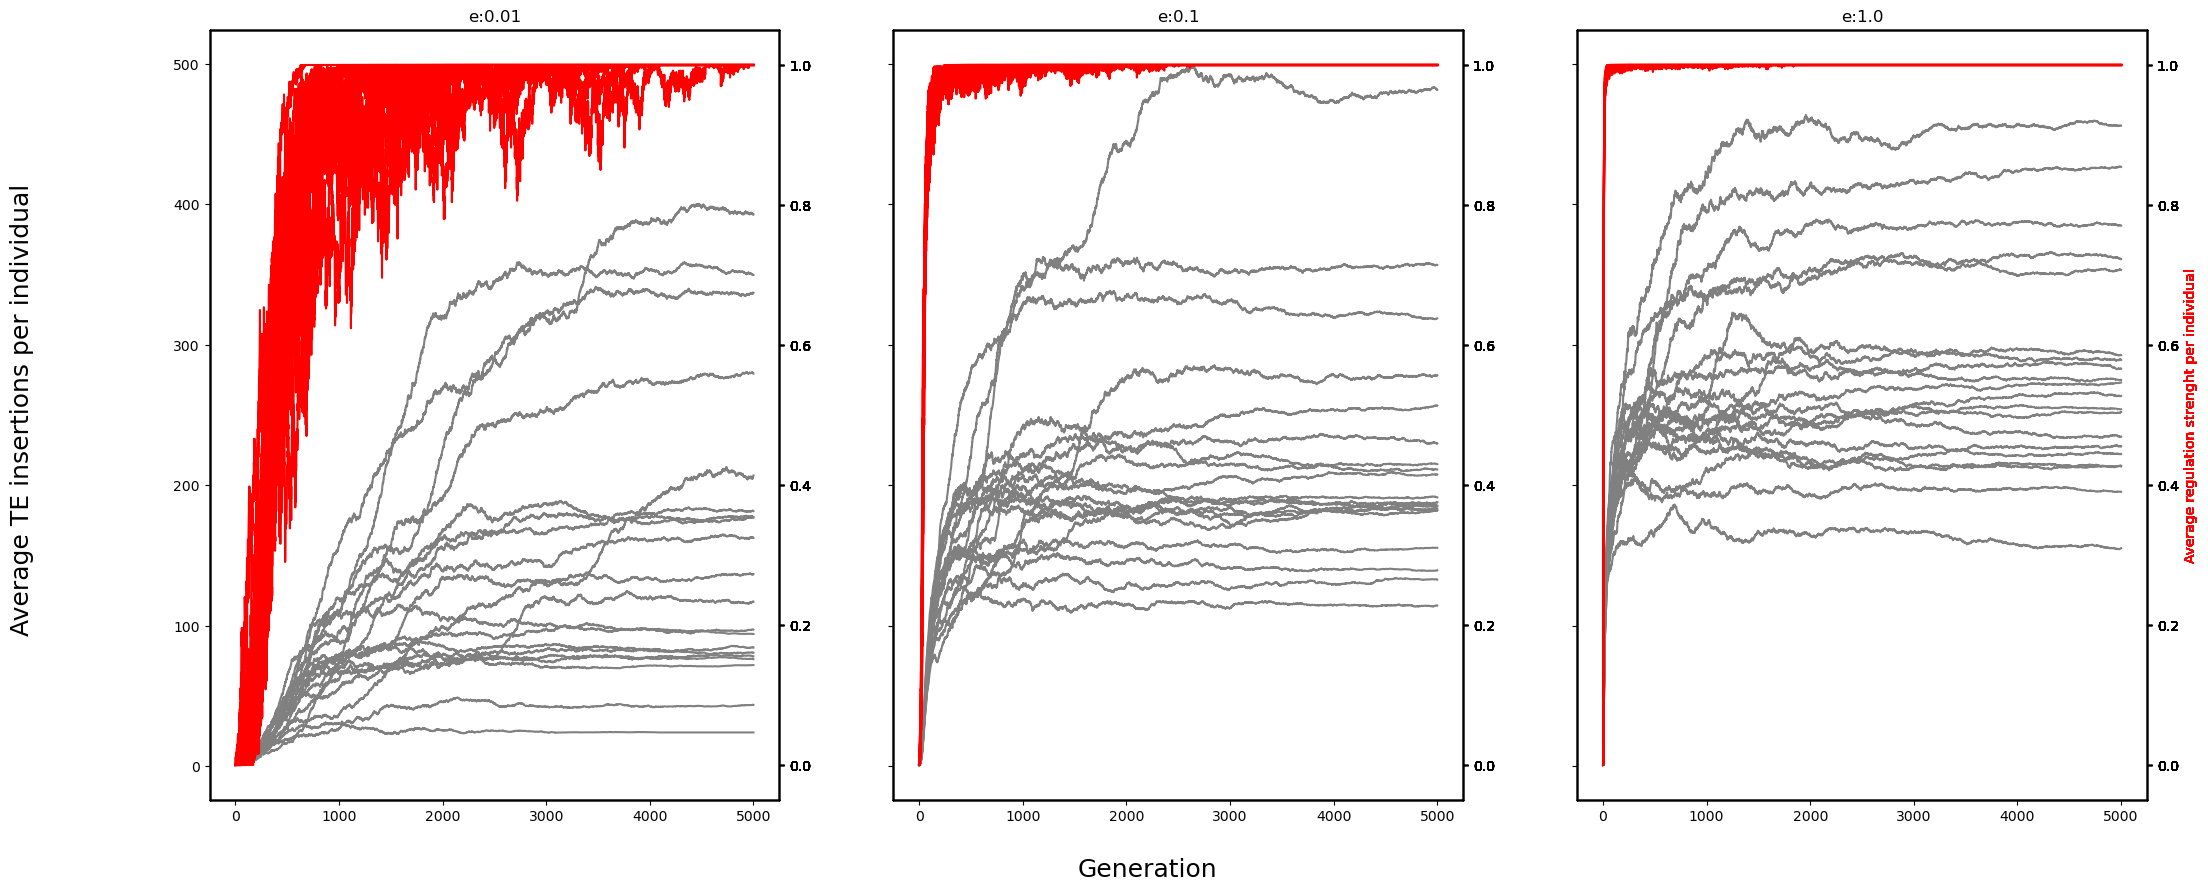

In [9]:
sns.reset_defaults()
# Plot the results!
# Set up the figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25, 10),)

for index, row in df001.iterrows():
    f = sns.lineplot(
        x=np.arange(len(row['AvgCopyNum'])),
        y=np.asarray(row['AvgCopyNum']),
        color="grey",
        ax=ax1,
    ).set_title("e:0.01")
    ax11 = ax1.twinx()
    z = sns.lineplot(
        x=np.arange(len(row['AvgCopyNum'])),
        y=np.asarray([0.0] + list(row['TE_1_RG'])),
        color="red",
        ax=ax11,
    )   

for index, row in df01.iterrows():
    f = sns.lineplot(
        x=np.arange(len(row['AvgCopyNum'])),
        y=np.asarray(row['AvgCopyNum']),
        color="grey",
        ax=ax2,
    ).set_title("e:0.1")
    ax22 = ax2.twinx()
    z = sns.lineplot(
        x=np.arange(len(row['AvgCopyNum'])),
        y=np.asarray([0.0] + list(row['TE_1_RG'])),
        color="red",
        ax=ax22,
    ) 
    
for index, row in df1.iterrows():
    f = sns.lineplot(
        x=np.arange(len(row['AvgCopyNum'])),
        y=np.asarray(row['AvgCopyNum']),
        color="grey",
        ax=ax3,
    ).set_title("e:1.0")
    ax33 = ax3.twinx()
    z = sns.lineplot(
        x=np.arange(len(row['AvgCopyNum'])),
        y=np.asarray([0.0] + list(row['TE_1_RG'])),
        color="red",
        ax=ax33,
    )
    ax33.set_ylabel('Average regulation strenght per individual', color='r')


fig = ax1.figure
fig.text(0.5, 0.04, "Generation", ha="center", va="center", size=18)
fig.text(
    0.05,
    0.5,
    "Average TE insertions per individual",
    ha="center",
    va="center",
    rotation=90,
    size=18,
) 

In [10]:
fig.savefig('piRNAvalidation.pdf')

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns
'''def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })


set_style()'''
sns.reset_orig()
plt.rc('text', usetex=True)

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']